<a href="https://colab.research.google.com/github/ParamAhuja/DL_Notebooks/blob/main/neural_network_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([
    [8, 8, 4],
    [7, 9, 5],
    [6, 10, 6],
    [5, 12, 7]
], columns= ["cgpa", "resume_score", "lpa"])

In [3]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [4]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [5]:
X

array([[1.        , 0.        ],
       [0.66666667, 0.25      ],
       [0.33333333, 0.5       ],
       [0.        , 1.        ]])

In [6]:
y.values

array([4, 5, 6, 7])

0. initialize parameters and visualize the architechture
1. For each epoch, call the function that loops m times and takes random samples each time to find the gradient of loss and the loss, returns all them. which are then used to update the parameters and also to calculate the avg. loss.

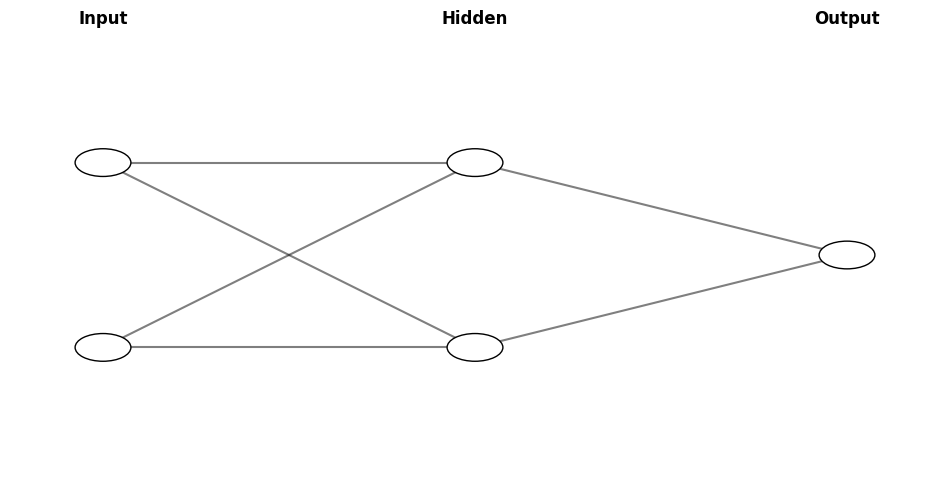

In [7]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_labels=None):
    '''
    Draw a simple feedforward neural network with matplotlib.

    ax: matplotlib Axes object
    left, right, bottom, top: boundaries of the drawing space
    layer_sizes: list of number of neurons in each layer
    layer_labels: optional list of strings for layer names
    '''
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for i, n in enumerate(layer_sizes):
        layer_top = v_spacing * (n - 1) / 2. + (top + bottom) / 2.
        for j in range(n):
            circle = plt.Circle((left + i * h_spacing, layer_top - j * v_spacing), 0.03,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (n_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (n_b - 1) / 2. + (top + bottom) / 2.
        for j in range(n_a):
            for k in range(n_b):
                line = plt.Line2D([left + i * h_spacing, left + (i + 1) * h_spacing],
                                  [layer_top_a - j * v_spacing, layer_top_b - k * v_spacing],
                                  c='k', alpha=0.5)
                ax.add_artist(line)

    # Labels
    if layer_labels:
        for i, label in enumerate(layer_labels):
            ax.text(left + i * h_spacing, top + 0.1, label, ha='center', fontsize=12, weight='bold')

# Plot the network
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
ax.axis('off')


# Example: 3-layer NN with 3 input, 5 hidden, and 2 output neurons
draw_neural_net(ax, .1, .9, .1, .9, [X.shape[1], 2, 1], layer_labels=["Input", "Hidden", "Output"])
plt.show()


In [32]:
def init_param(layer_dim:list):
  w = []
  b = []
  for i in range(len(layer_dim)-1):
    w.append( np.ones((layer_dim[i], layer_dim[i+1])) )
    b.append( np.zeros(layer_dim[i+1]) )
  return w, b
w, b = init_param([2, 2, 1])
b
# shape of b is fucked but whatever

[array([0., 0.]), array([0.])]

In [ ]:
# def transpose(a):
#   for i in range(len(a)): # 0,1
#     for j in range(i):
#       a[i][j], a[j][i] = a[j][i], a[i][j]
#   return a
# used reshape and simply .T instead

In [53]:
def forward_pass(x, w, b):
  layer_count = len(w)
  # for i in range(layer_count):

  O = [x]
  a=x
  for k in range(layer_count):
    w_k = w[k]
    # print(w_k)
    # w_t = w_k.reshape(-1,w_k.shape[0] )
    w_t = w_k.T
    a_t = a.reshape( a.shape[0], 1)
    # print(x_t)
    O.append(np.dot(w_t, a_t) + b[k].reshape(b[k].shape[0], 1))
    a= O[-1]
    # print("o:", x)
  return O

print(forward_pass(X[0], w, b))

[array([1., 0.]), array([[1.],
       [1.]]), array([[2.]])]


In [52]:
forward_pass(X[0], w, b)

[array([1., 0.]),
 array([[1.],
        [1.]]),
 array([[2.]])]

In [44]:
def compute_loss(x, target, w, b):
  O = forward_pass(x, w, b)
  y_hat = O[-1]
  error = target - y_hat
  loss = error**2
  dl_dy = -2* error

  # now the gradients
  layer_count = len(w) # no. of layers
  layer_dim = [w[0].shape[0]]
  for i in range(layer_count):
    layer_dim.append(
        w[i].shape[1]
    )

  w_gradients = []

  for i in range(len(layer_dim)-1):
    w_gradients.append( np.zeros((layer_dim[i], layer_dim[i+1])) )

  for k in range(len(layer_dim)-1 ):    # each layer dim
    for i in range(layer_dim[k]):       # each incoming node
      for j in range(layer_dim[k+1]):   # each outgoing node
        dj_dw_kij = dl_dy* 1 * O[k][i]      # calculate this !!!!!!!

        w_gradients[k][i][j] += dj_dw_kij

  b_gradients = []
  for i in range(len(b)):
    b_gradients.append( np.zeros(b[i].shape))

  for i in range(len(b_gradients)):
    for j in range(len(b_gradients[i])):
      b_gradients[i][j] += dl_dy # calculate this!!!!!!!

  return w_gradients,b_gradients, loss[0][0]
wg, bg, l = compute_loss(X[0], y[0], w, b)
wg

TypeError: only length-1 arrays can be converted to Python scalars

In [40]:
def back_propagation(X, y, epochs, alpha, layer_dims):
  w, b = init_param(layer_dims)
  for u in range(epochs):
    losses = []
    for v in range(X.shape[0]):
      selected = np.random.randint(0, X.shape[0])
      sample = X[selected]
      target = y[selected]
      w_gradients, b_gradients, loss = compute_loss(sample,target, w, b)

      for i in range(len(w_gradients)):
        w_gradients[i] = alpha * w_gradients[i]
        w[i] = w[i] - w_gradients[i]

      for i in range(len(b)):
        b[i] = b[i] - alpha * b_gradients[i]
      losses.append(loss)
    avg_loss = np.mean(losses)
    print(f"epoch: {u}, loss: {avg_loss}")
  return w, b
back_propagation(X, y, epochs = 10, alpha = 0.1, layer_dims=[2,2,1])

epoch: 0, loss: 23.34609179541024
epoch: 1, loss: 40.26249632229151
epoch: 2, loss: 6.110472897231615
epoch: 3, loss: 16.584153334739742
epoch: 4, loss: 1.9500167260682004
epoch: 5, loss: 38.55912089906439
epoch: 6, loss: 35.86433919166987
epoch: 7, loss: 41.95080672537193
epoch: 8, loss: 6.065585660686458
epoch: 9, loss: 1.0509149103413322


/tmp/ipython-input-39-3998686423.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_gradients[k][i][j] += dj_dw_kij
/tmp/ipython-input-39-3998686423.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_gradients[i][j] += dl_dy


([array([[1.33490137, 1.33490137],
         [1.33490137, 1.33490137]]),
  array([[1.33490137],
         [1.33490137]])],
 [array([0.33490137, 0.33490137]), array([0.33490137])])